### **Import Library**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Pandas Ver : {pd.__version__}")
print(f"Numpy  Ver : {np.__version__}")
print(f"Seaborn Ver : {sns.__version__}")

Pandas Ver : 1.1.5
Numpy  Ver : 1.19.5
Seaborn Ver : 0.11.1


### **Download Dan Mengecek Dataset**

In [48]:
!gdown --id "1X_uIQa7uZi5s7W94zvez9AEgNRNUwHqn"

Downloading...
From: https://drive.google.com/uc?id=1X_uIQa7uZi5s7W94zvez9AEgNRNUwHqn
To: /content/train.csv
100% 82.6k/82.6k [00:00<00:00, 28.5MB/s]


In [49]:
data = pd.read_csv('/content/train.csv')
data = data.drop(columns='Unnamed: 0')
data.sample(8)

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,GrLivArea,ExterCond,SalePrice
1318,none,14781,Pave,none,8,5,2001,2002,3,1787,TA,275000
307,none,7920,Pave,Grvl,6,7,1920,1950,2,1406,Fa,89500
500,21.0,1890,Pave,none,6,5,1973,1973,2,1218,TA,113000
1165,79.0,9541,Pave,none,7,5,2009,2009,3,1502,TA,233170
837,21.0,1680,Pave,none,6,5,1973,1973,2,987,TA,100000
350,68.0,7820,Pave,none,9,5,2007,2007,4,1869,TA,318061
1125,60.0,10434,Pave,none,4,5,1955,1955,2,1005,TA,115000
718,96.0,10542,Pave,none,7,5,1993,1994,3,2418,TA,341000


#### **Check Deskripsi Data**

In [50]:
data.describe(include='all')

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,GrLivArea,ExterCond,SalePrice
count,1460,1460.000000,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460,1460.000000
unique,111,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,none,NaN,Pave,none,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN
freq,259,NaN,1454,1369,NaN,NaN,NaN,NaN,NaN,NaN,1282,NaN
mean,NaN,10516.828082,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,2.39589,1515.463699,NaN,180921.195890
std,NaN,9981.264932,NaN,NaN,1.382997,1.112799,30.202904,20.645407,0.57428,525.480383,NaN,79442.502883
min,NaN,1300.000000,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,1.00000,334.000000,NaN,34900.000000
25%,NaN,7553.500000,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,2.00000,1129.500000,NaN,129975.000000
50%,NaN,9478.500000,NaN,NaN,6.000000,5.000000,1973.000000,1994.000000,2.00000,1464.000000,NaN,163000.000000
75%,NaN,11601.500000,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,3.00000,1776.750000,NaN,214000.000000


#### **Cek Data Kosong**

In [51]:
data.isnull().sum()

LotFrontage     0
LotArea         0
Street          0
Alley           0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
GrLivArea       0
ExterCond       0
SalePrice       0
dtype: int64

#### **Check Informasi Data**

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotFrontage   1460 non-null   object
 1   LotArea       1460 non-null   int64 
 2   Street        1460 non-null   object
 3   Alley         1460 non-null   object
 4   OverallQual   1460 non-null   int64 
 5   OverallCond   1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   YearRemodAdd  1460 non-null   int64 
 8   ExterQual     1460 non-null   int64 
 9   GrLivArea     1460 non-null   int64 
 10  ExterCond     1460 non-null   object
 11  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.0+ KB


#### **Check Ukuran Data**

In [53]:
data.shape

(1460, 12)

### **Menentukan Data Kategorikal Dan Numerik**

In [54]:
numerical = data.select_dtypes(include=[np.number]).columns.tolist()
numerical

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'GrLivArea',
 'SalePrice']

In [55]:
categorical = data.select_dtypes(include=[object]).columns.tolist()
categorical.remove('LotFrontage')
categorical

['Street', 'Alley', 'ExterCond']

### **Eksplorasi Data Kategorikal**

In [56]:
def draw_bars(df, x, y, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))

    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=x, y=y, data=df, ci='sd')
        ax.set_title(var_name)

    fig.tight_layout()
    plt.show()

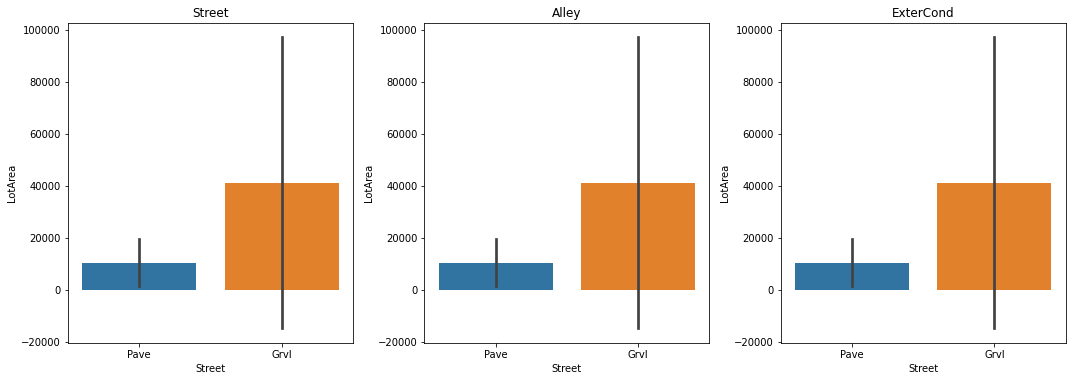

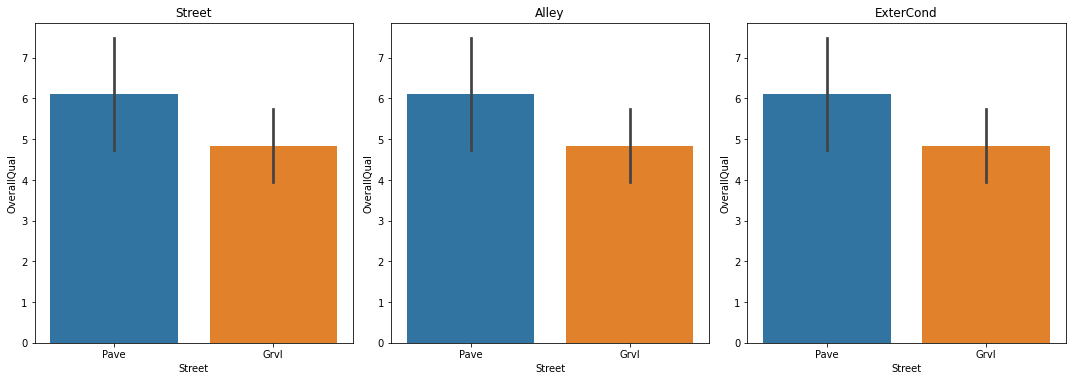

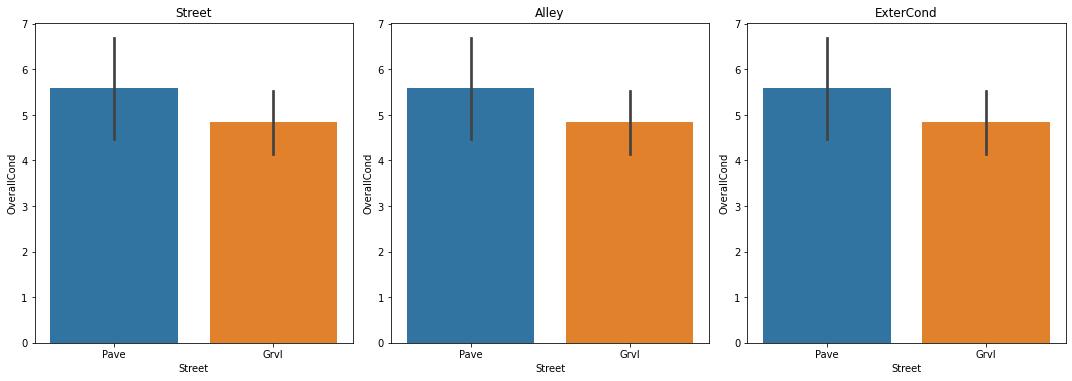

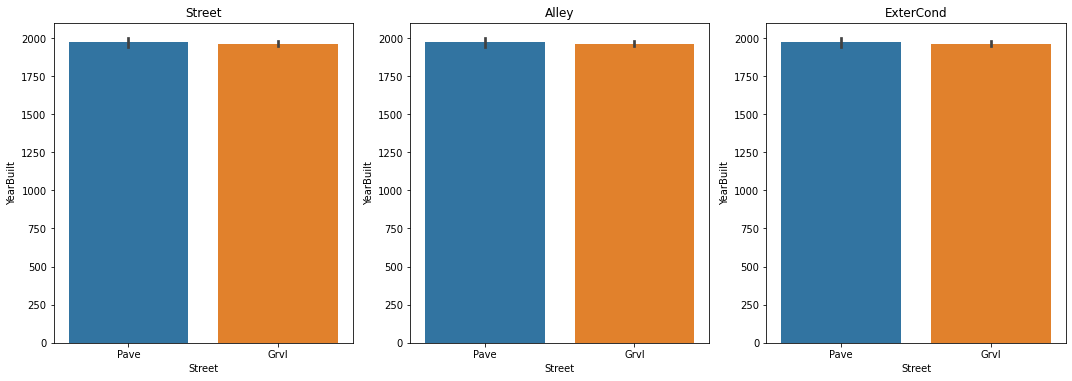

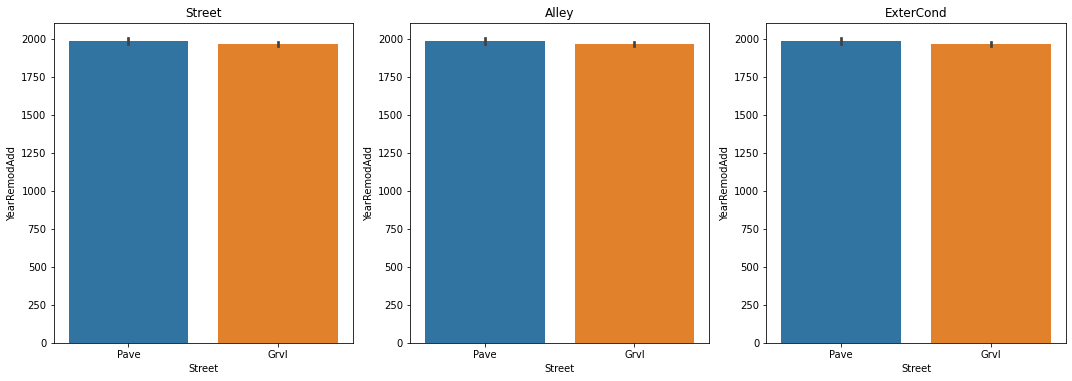

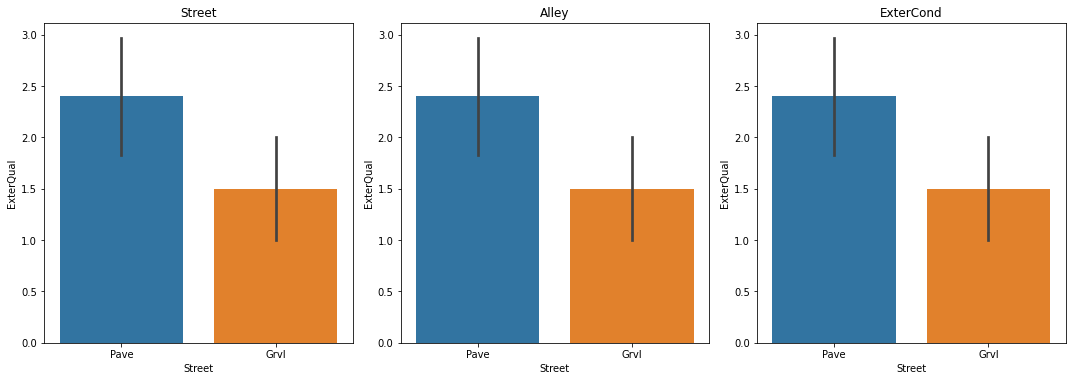

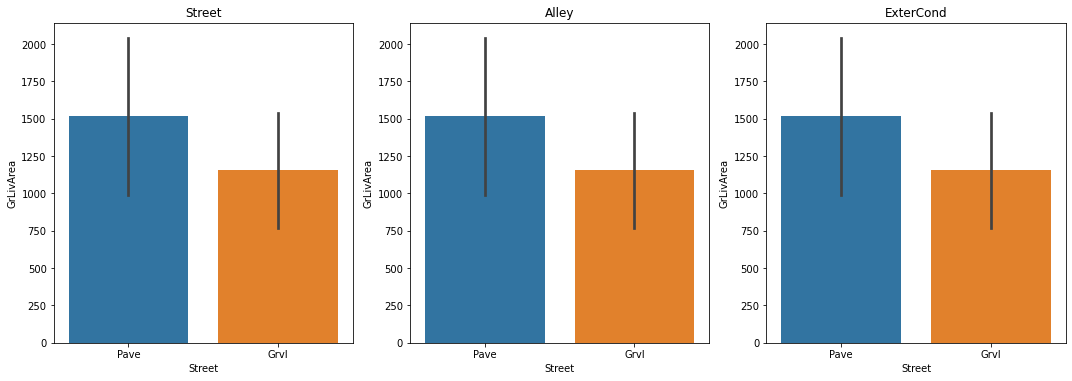

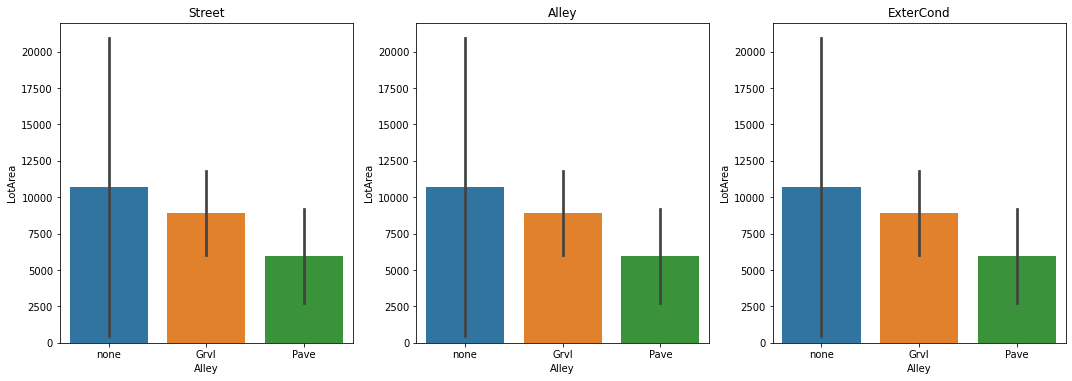

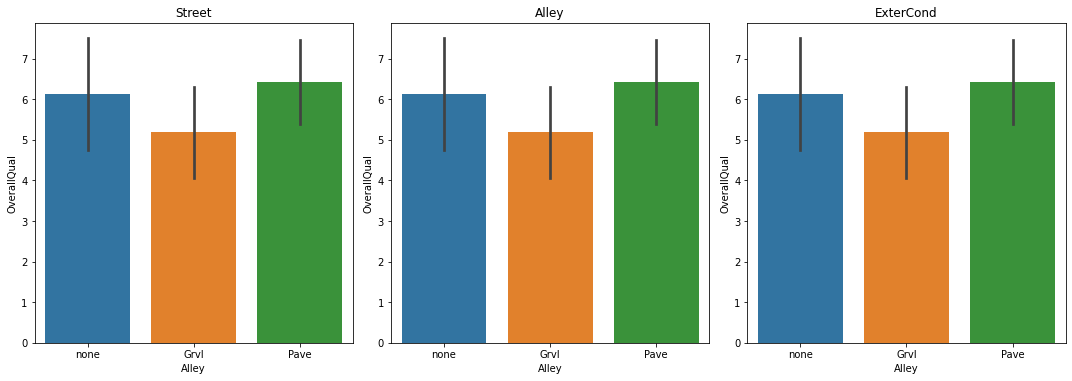

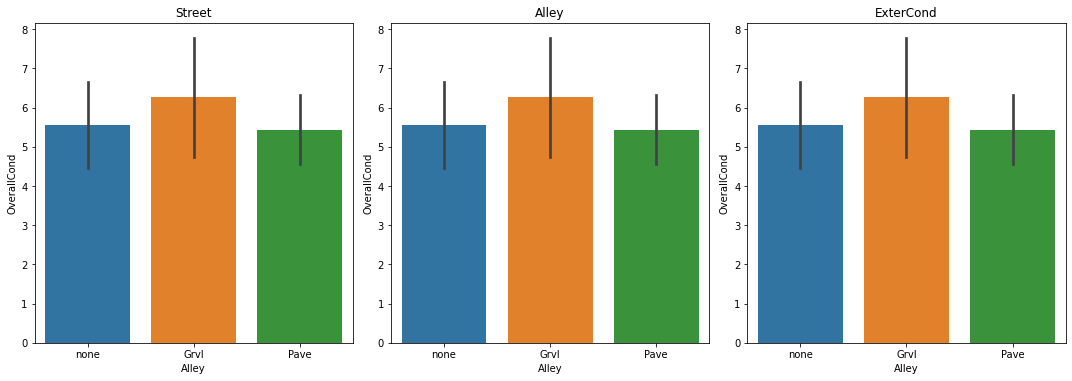

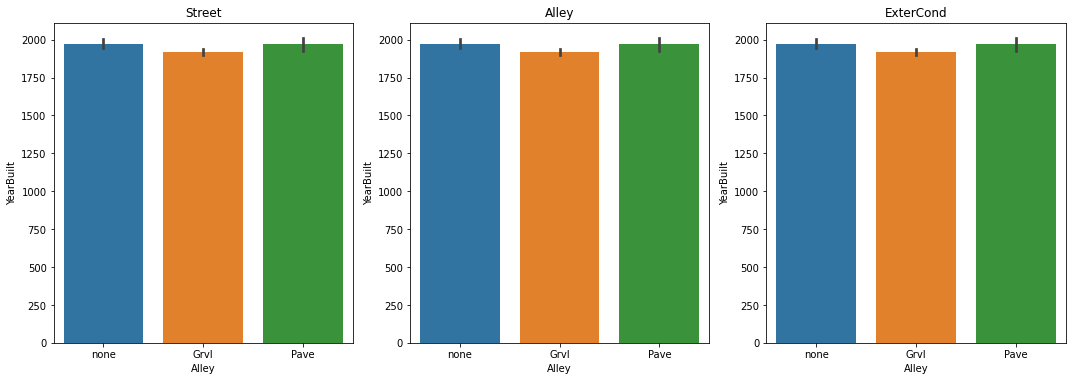

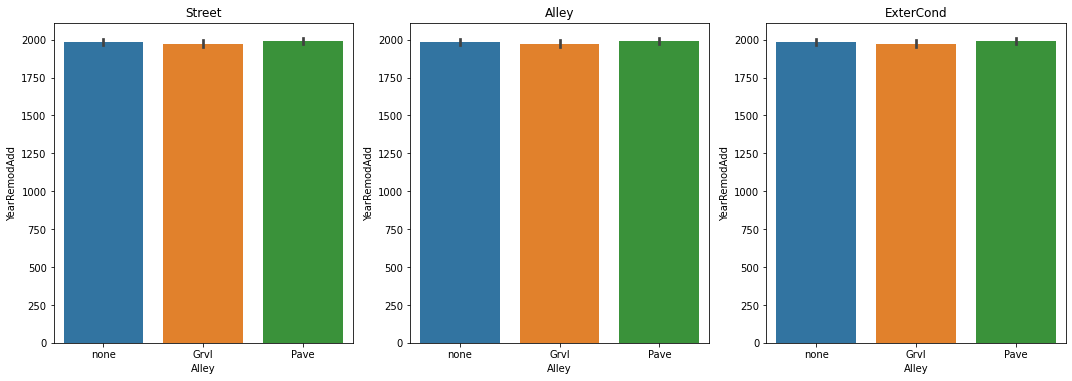

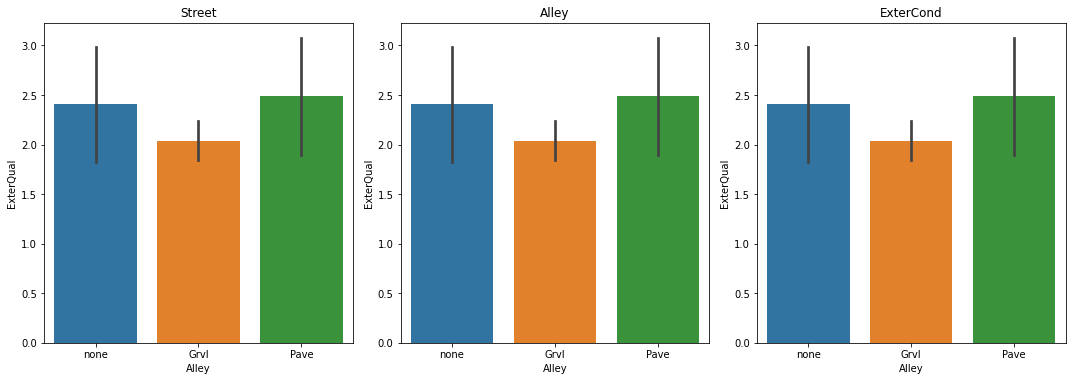

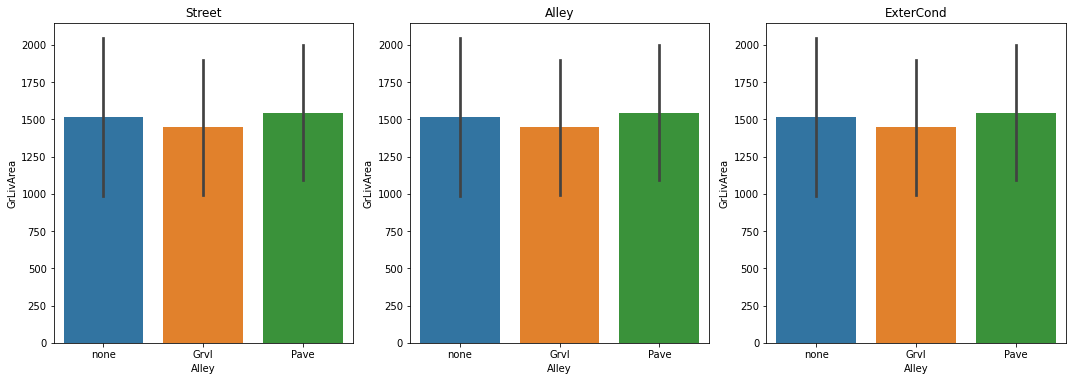

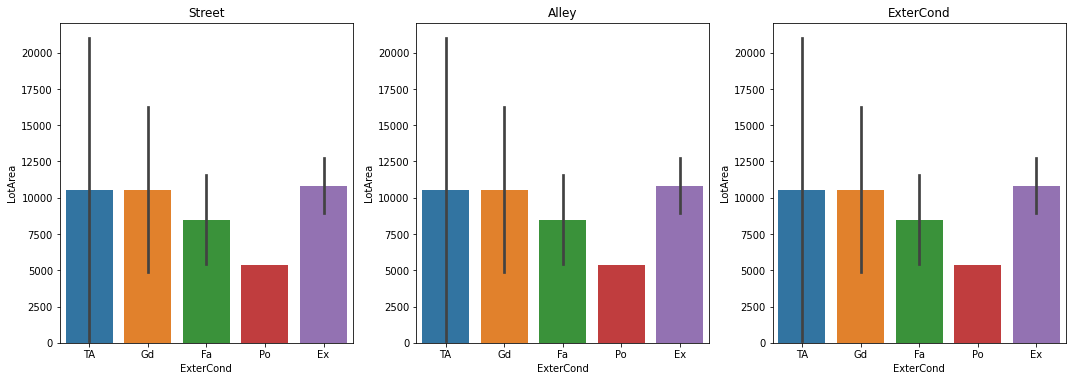

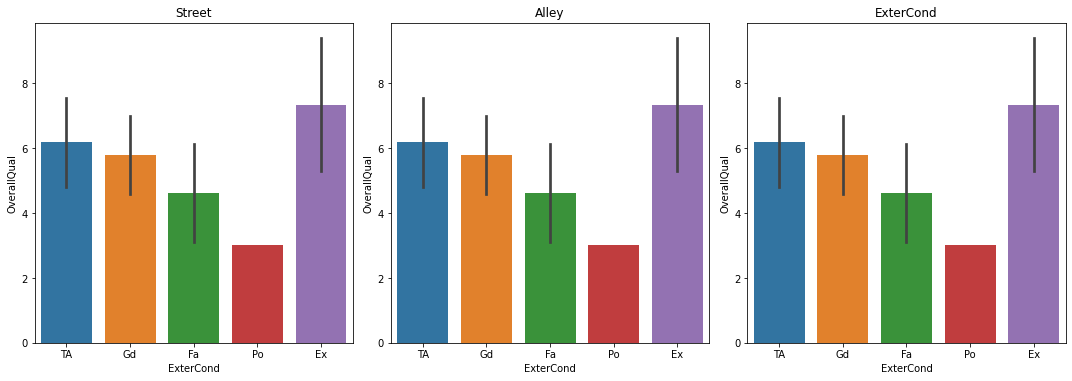

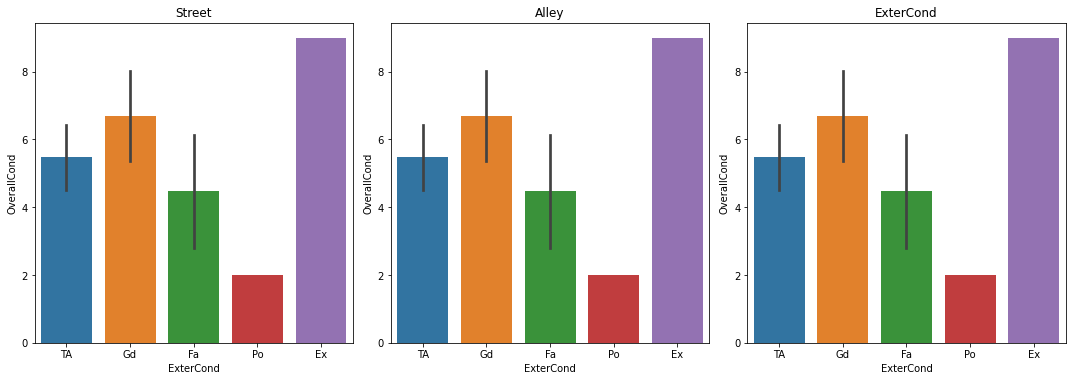

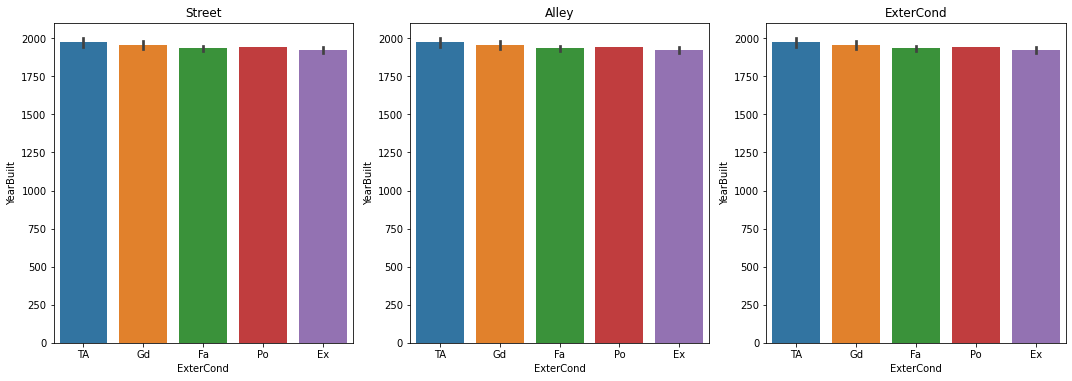

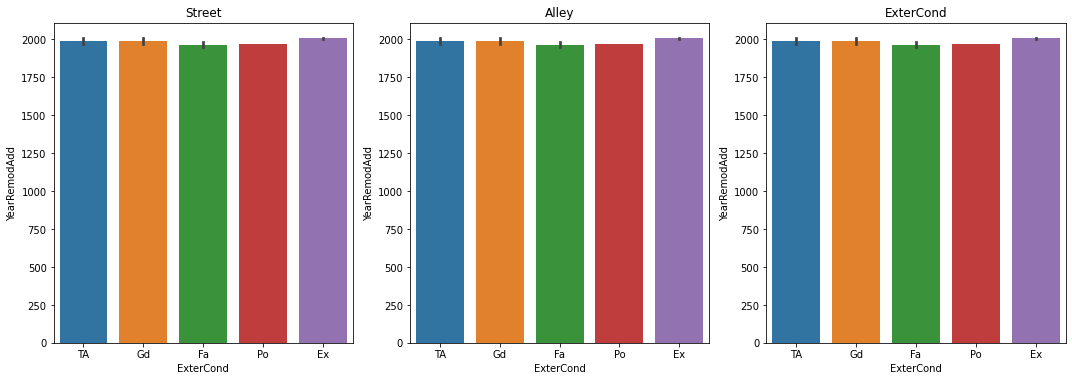

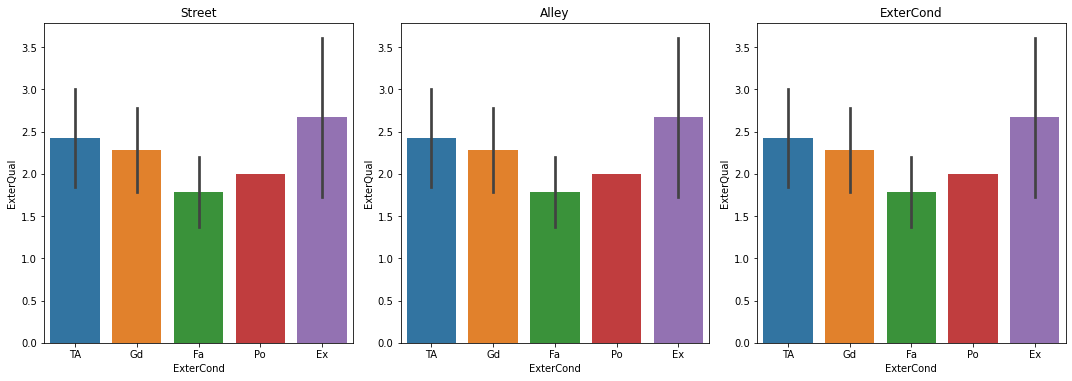

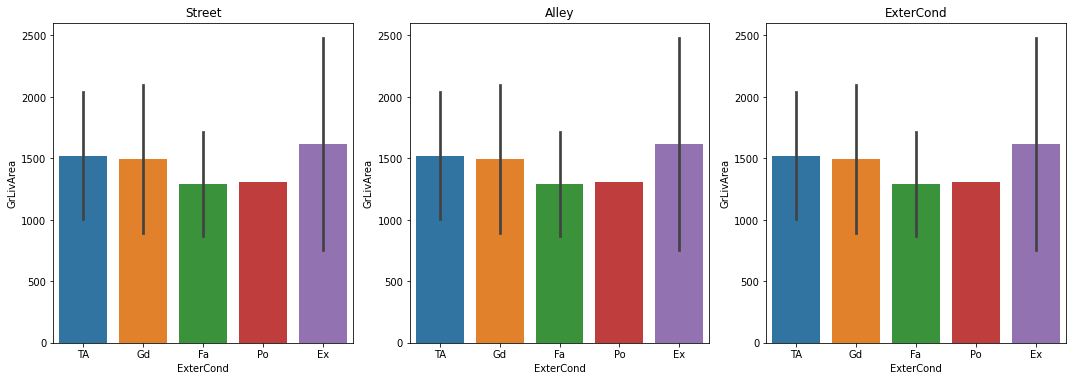

In [57]:
for x in categorical:
    for y in numerical[:-1]:
          draw_bars(data, x, y, categorical, int(len(categorical)/2)+1, 3)

### **Eksplorasi Data Numerical**

In [58]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(16,20))

    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        data[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(data[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(data[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
        
    fig.tight_layout()
    plt.show()

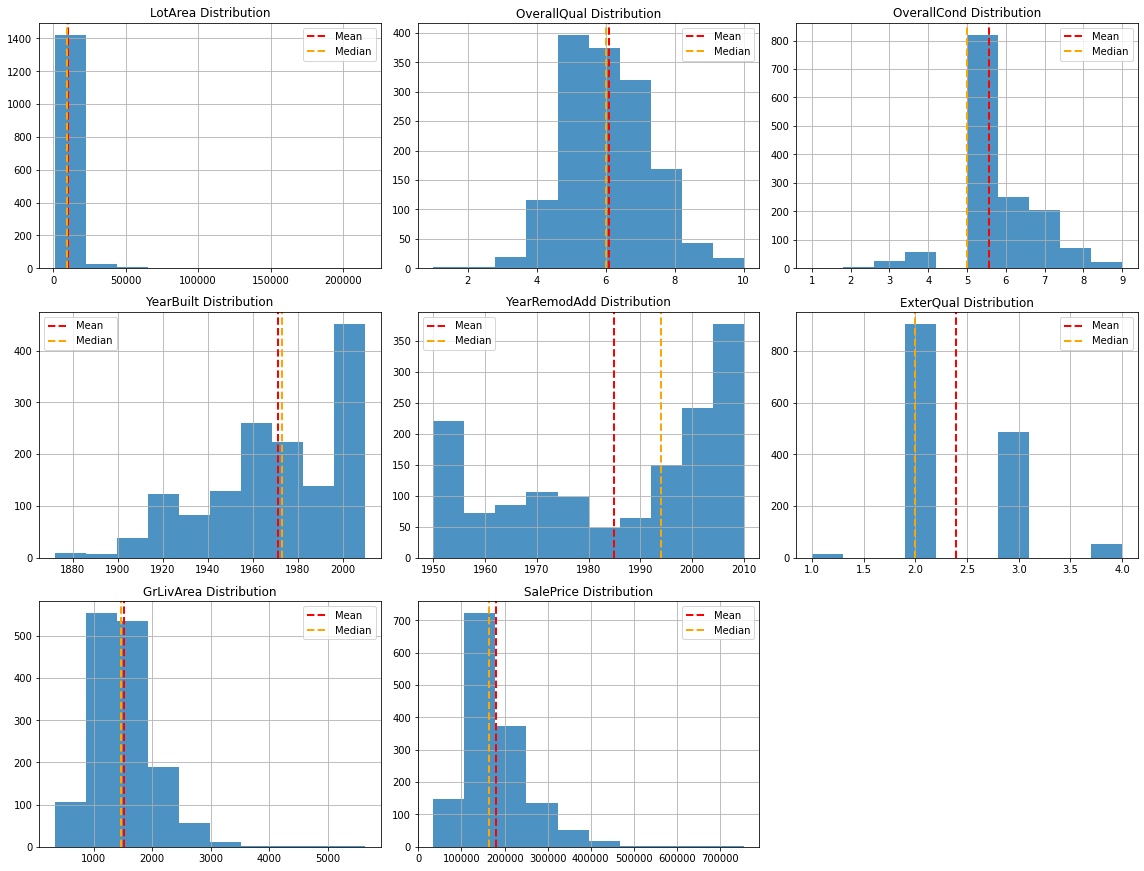

In [59]:
draw_histograms(data, numerical, int(len(numerical)/2)+1, 3)

In [60]:
def draw_scatters(df, y, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(18, 18))

    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.regplot(x=var_name, y=y, data=df, fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs "+ y)

    fig.tight_layout()
    plt.show()

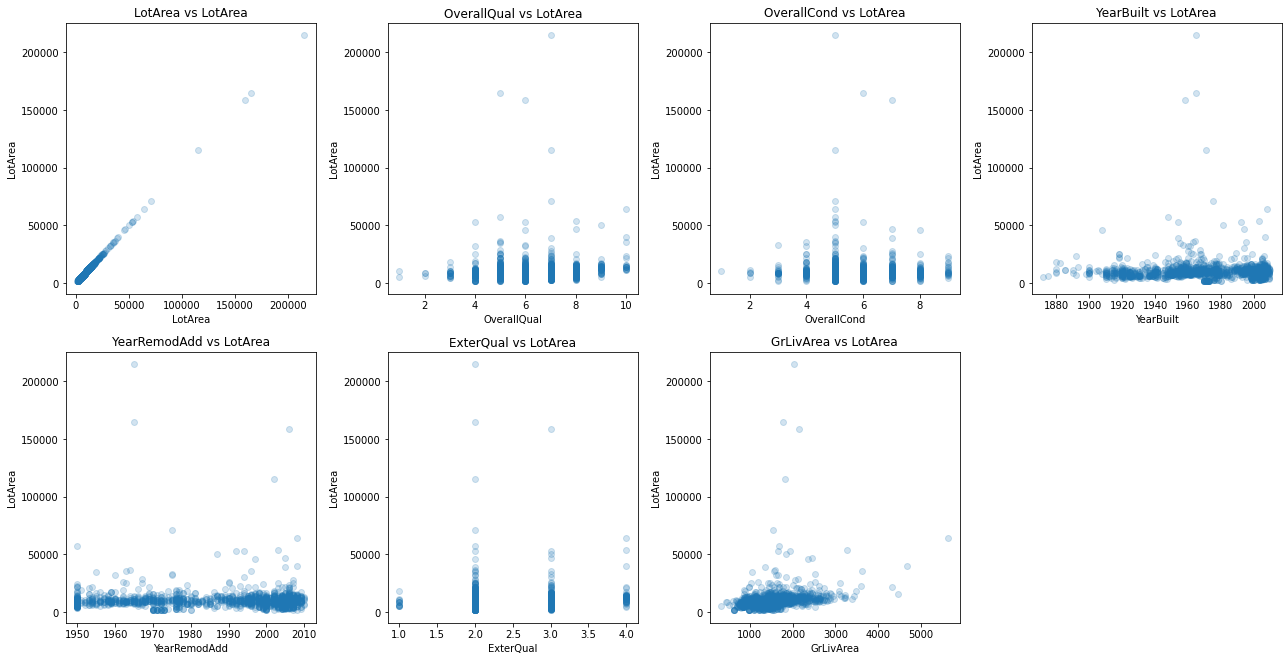

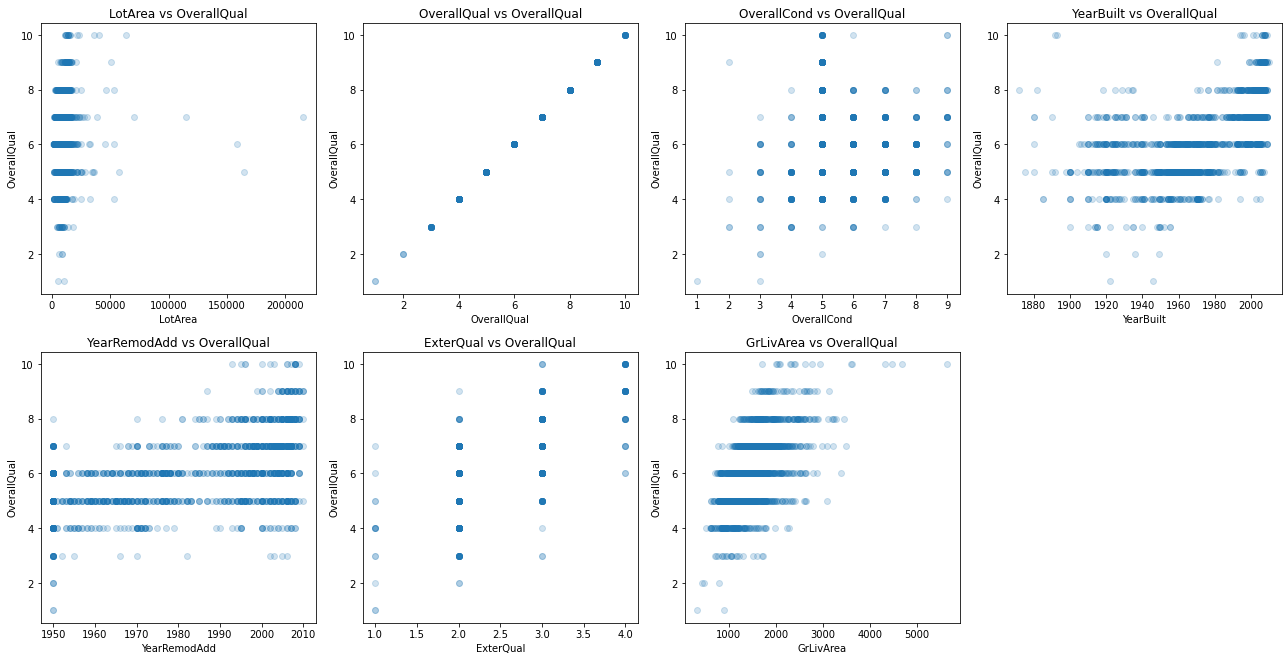

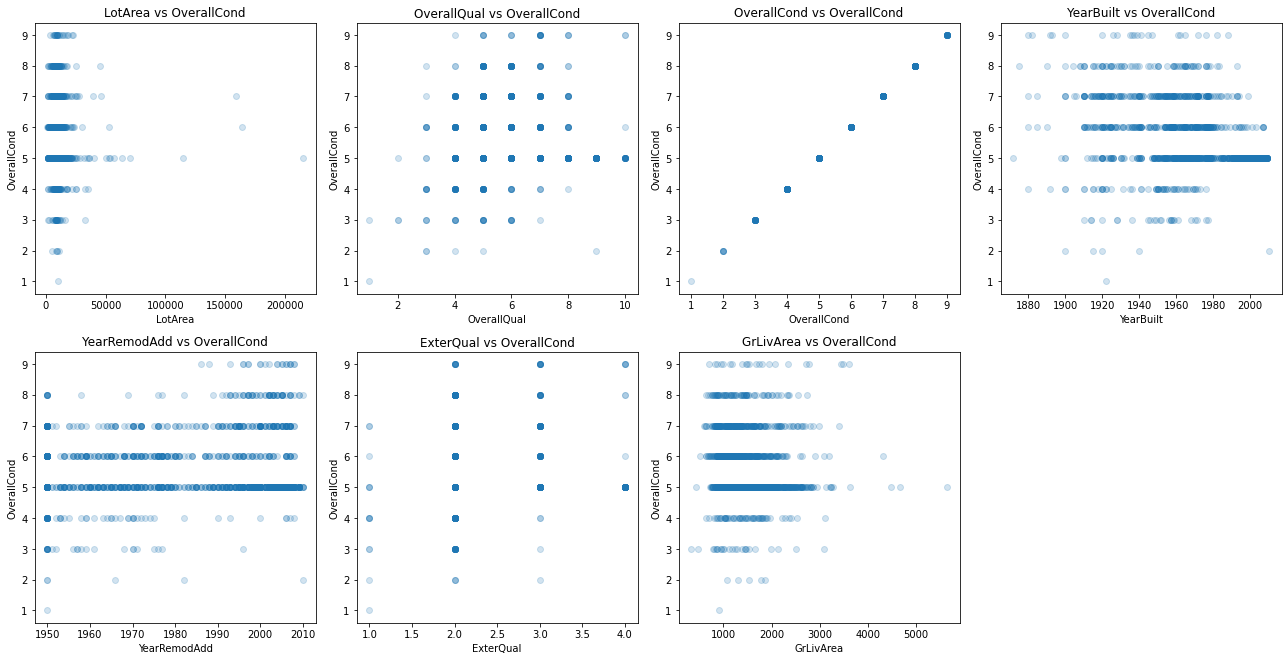

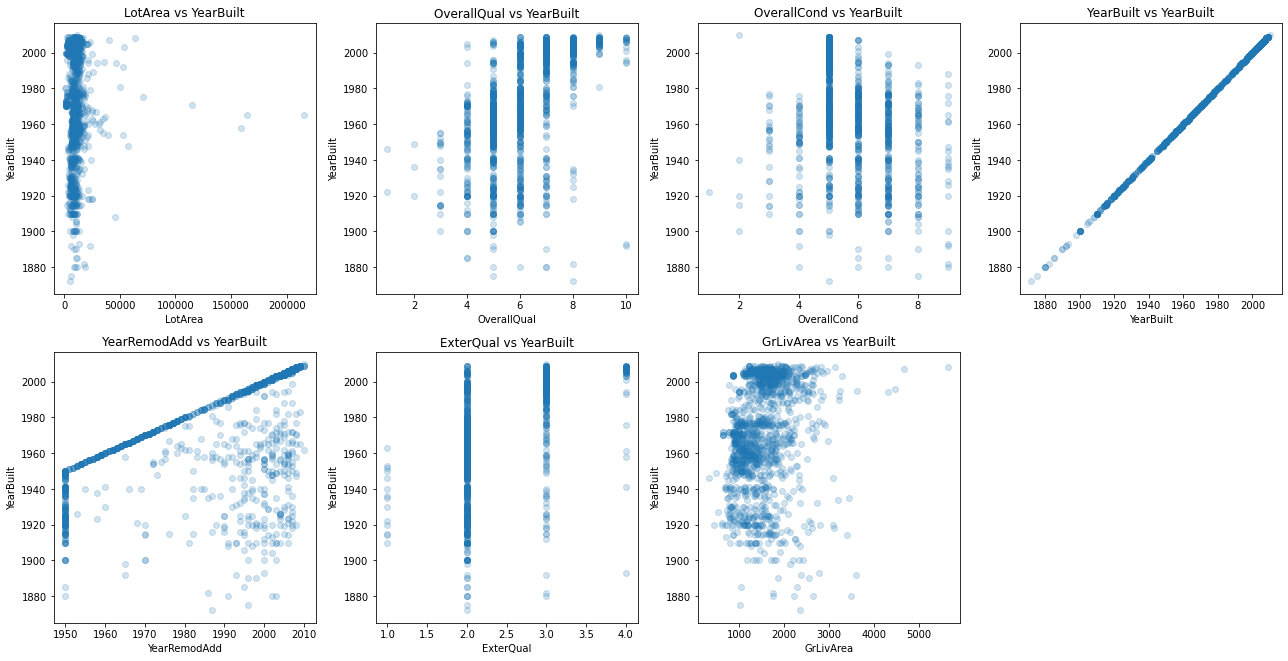

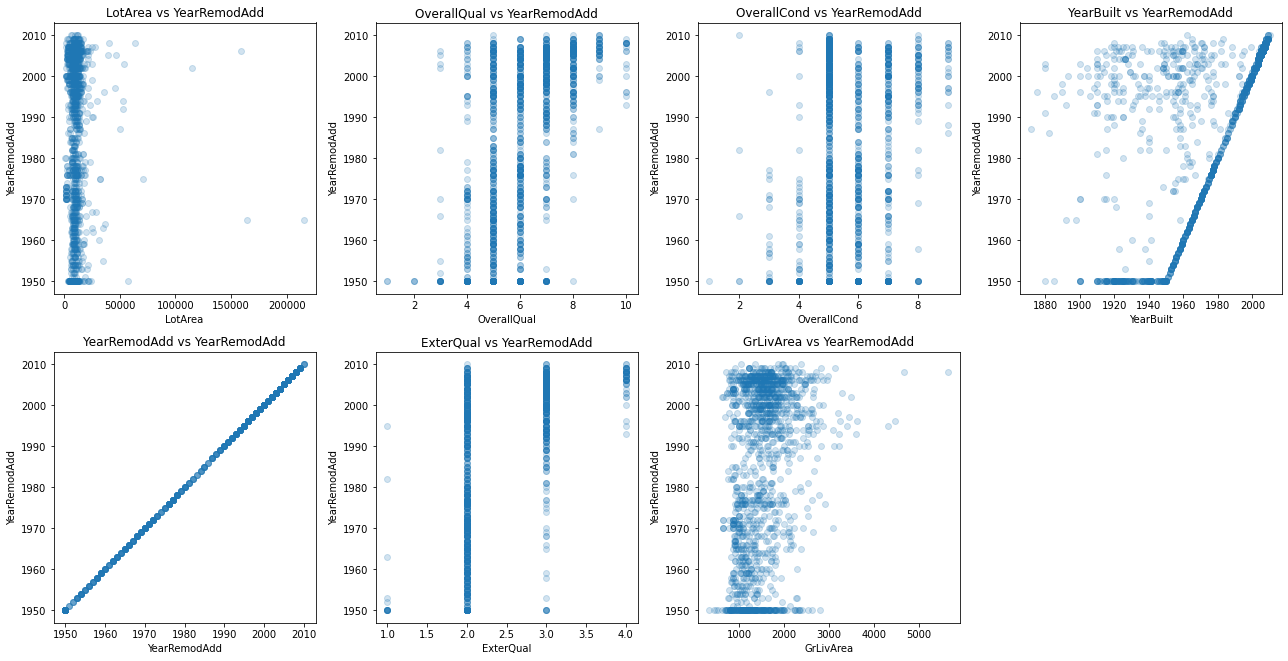

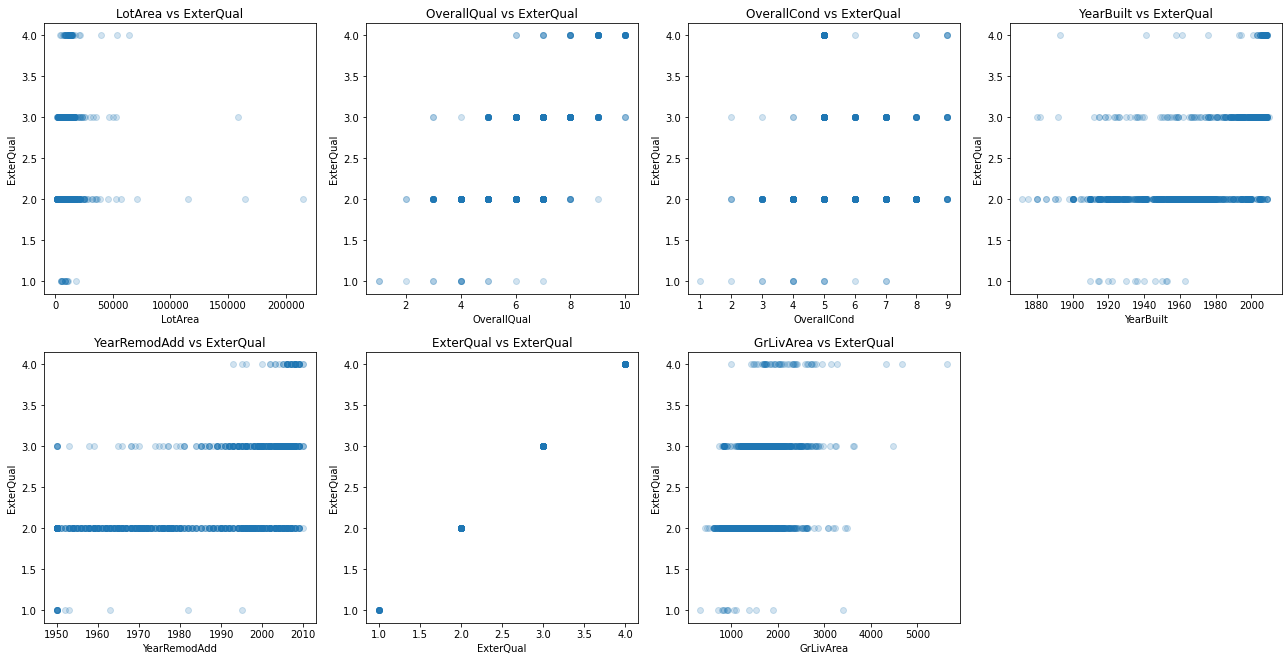

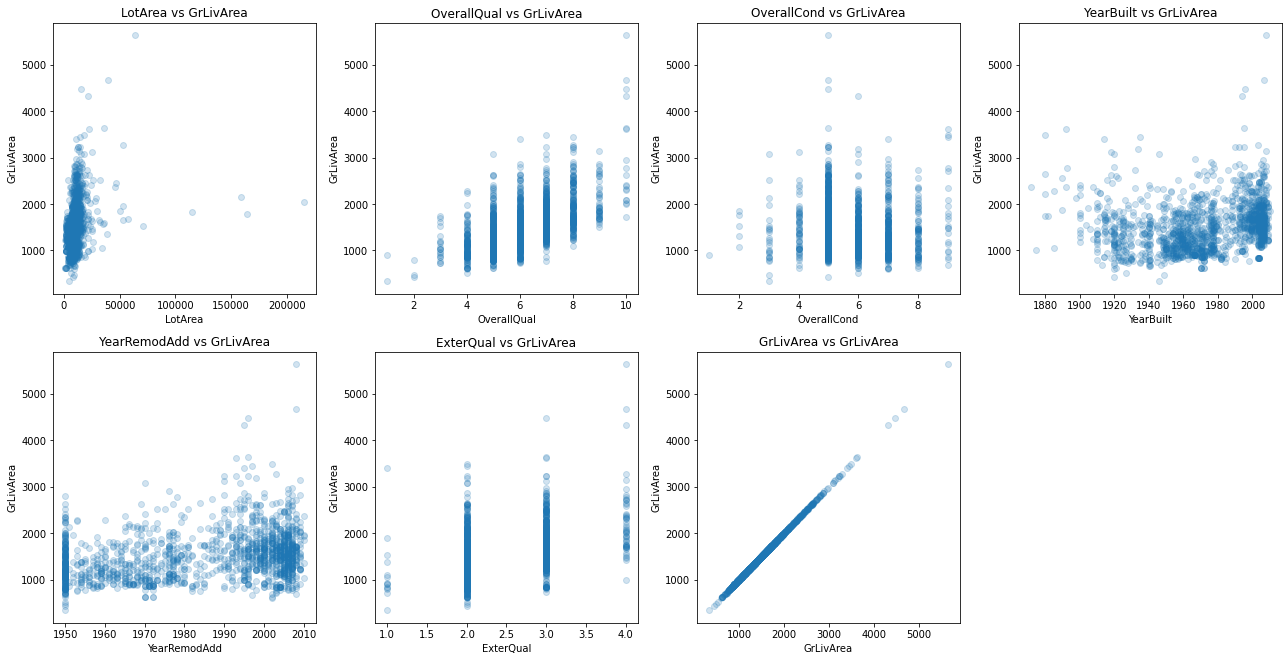

In [61]:
for y in numerical[:-1]:
    draw_scatters(data, y, numerical[:-1], int(len(numerical[:-1])/2)+1, 4)

### **Mengecek Korelasi Data**

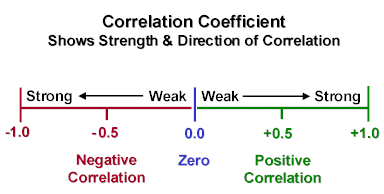

In [62]:
corr = data.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
OverallCond    -0.077856
Name: SalePrice, dtype: float64

Berdasarkan korelasi data diatas dapat disimpulkan kolom SalePrice berkorelasi kuat dengan beberapa kolom lainnya seperti OverallQual, GrLivArea, ExterQual, YearBuilt Dan YearRemodAdd. Sedangkan SalePrice memiliki korelasi lemah dengan LotArea dan tidak memiliki korelasi dengan kolom OverallCond

#### **Korelasi Data Numerical**

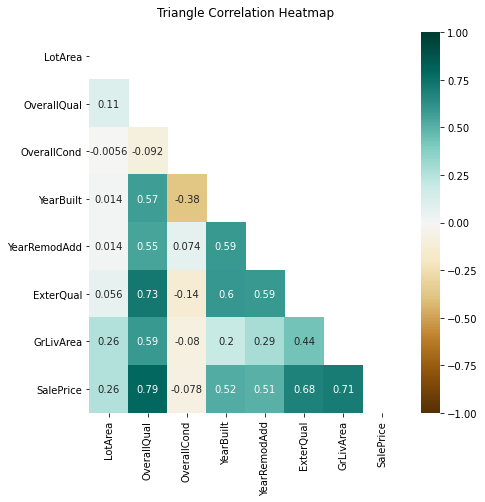

In [63]:
plt.figure(figsize=(7, 7))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

Pada Triangle Correlation Heatmap diatas dapat disimpulkan beberapa kolom memiliki korelasi yang tinggi terhadap beberapa kolom lainnya. Korelasi pada kolom yang bukan merupakan target variable (SalePrice) merupakan Korelasi Hubungan Timbal Balik (interrelationship) dimana kolom X akan mempengaruhi kolom Y dan sebaliknya kolom Y mempengaruhi kolom X sehingga perubahan pada kolom X ataupun Y dapat saling mempengaruhi.

#### **Korelasi Data Categorical**

In [64]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [65]:
data_cor = []

for cat in categorical:
    for num in numerical:
        corr = cramers_v(data[cat], data[num])
        data_cor.append([cat, num, round(corr, 2)])

data_cor = sorted(data_cor, key=lambda x:(x[2]), reverse=True)

for corr in data_cor:
    print(f'Korelasi {corr[0]} dan {corr[1]}: {corr[2]}')

Korelasi Street dan LotArea: 0.39
Korelasi Street dan SalePrice: 0.39
Korelasi Alley dan YearBuilt: 0.39
Korelasi ExterCond dan OverallCond: 0.38
Korelasi ExterCond dan YearBuilt: 0.34
Korelasi Street dan ExterQual: 0.32
Korelasi ExterCond dan SalePrice: 0.31
Korelasi Street dan YearRemodAdd: 0.25
Korelasi ExterCond dan GrLivArea: 0.25
Korelasi Street dan YearBuilt: 0.21
Korelasi ExterCond dan OverallQual: 0.19
Korelasi ExterCond dan ExterQual: 0.18
Korelasi Alley dan OverallCond: 0.12
Korelasi Alley dan YearRemodAdd: 0.12
Korelasi Alley dan ExterQual: 0.11
Korelasi ExterCond dan YearRemodAdd: 0.11
Korelasi Alley dan OverallQual: 0.1
Korelasi Street dan OverallQual: 0.07
Korelasi Street dan OverallCond: 0.07
Korelasi Street dan GrLivArea: 0.0
Korelasi Alley dan LotArea: 0.0
Korelasi Alley dan GrLivArea: 0.0
Korelasi Alley dan SalePrice: 0.0
Korelasi ExterCond dan LotArea: 0.0
